# 辐射gamma射线的混合型超新星遗迹

% all from vink 2020

超新星遗迹辐射伽马射线源往往有两种起源，强子起源与轻子起源，研究其的关系可以更好的帮助我们理解宇宙粒子逃脱的过程。

超新星被认为是保持银河系宇宙射线群的起源。

混合型超新星遗迹也往往与VHE伽马射线源相关联。根据Chicago TeV catalogue (http://tevcat.uchicago.edu/)，我们从文献中收集到的谱信息。需要注意，有一些TeV谱是很具假设一个纯幂律谱一盒的，厄尔其他的谱可能是从一个有截断的幂律谱拟合的。

/Users/jing/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib_venn/layout/venn3/pairwise.py:107: UserWarning: Circle B has zero area.
  warnings.warn("Circle B has zero area.")
/Users/jing/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib_venn/layout/venn3/pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


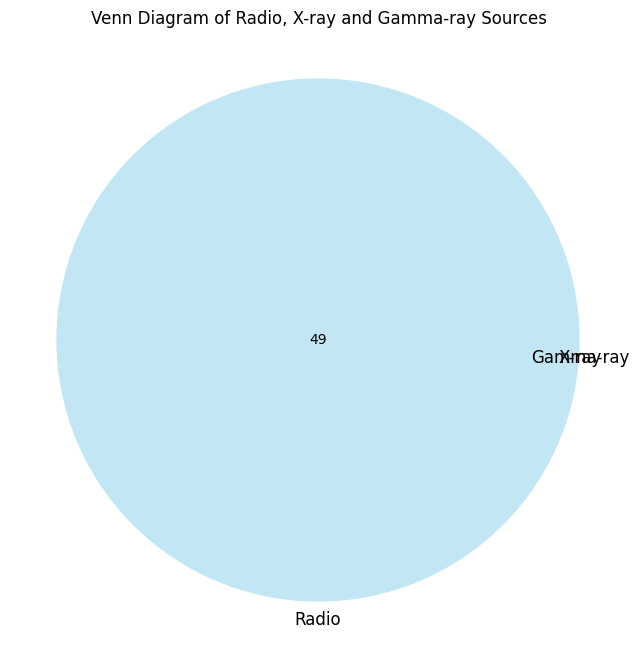

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 读取 CSV 文件
file_path = "../cat/three-cat.csv"  # 替换为你的 CSV 文件路径
df = pd.read_csv(file_path, delimiter=',')

# 筛选不同波段的源
radio_sources = set(df[df['radio'].str.contains('yes', na=False)]['normalized_name'])
x_sources = set(df[df['Xray'].str.contains('yes &', na=False)]['normalized_name'])
gamma_teV_sources = set(df[df['gamma_TeV'].str.contains('yes &', na=False)]['normalized_name'])
gamma_GeV_sources = set(df[df['gamma_GeV'].str.contains('yes &', na=False)]['normalized_name'])

# 合并gamma TeV和gamma GeV波段的源
gamma_sources = gamma_teV_sources.union(gamma_GeV_sources)



# 绘制 Venn 图，并美化
plt.figure(figsize=(8, 8))
venn3([radio_sources, x_sources, gamma_sources],
      set_labels=('Radio', 'X-ray', 'Gamma-ray'),
      set_colors=('skyblue', 'lightgreen', 'coral'),
      alpha=0.5)
plt.title("Venn Diagram of Radio, X-ray and Gamma-ray Sources")

plt.show()

/var/folders/5m/c475x_g94tqb0d5r3t8c3w7w0000gn/T/ipykernel_15033/58323531.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].apply(process_size)
/var/folders/5m/c475x_g94tqb0d5r3t8c3w7w0000gn/T/ipykernel_15033/58323531.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flux'] = df['flux'].astype(str).str.replace('?', '', regex=False)  # 去除问号
/var/folders/5m/c475x_g94tqb0d5r3t8c3w7w0000gn/T/ipykernel_15033/58323531.py:31: SettingWithCopyWarning: 
A value is trying to be set on

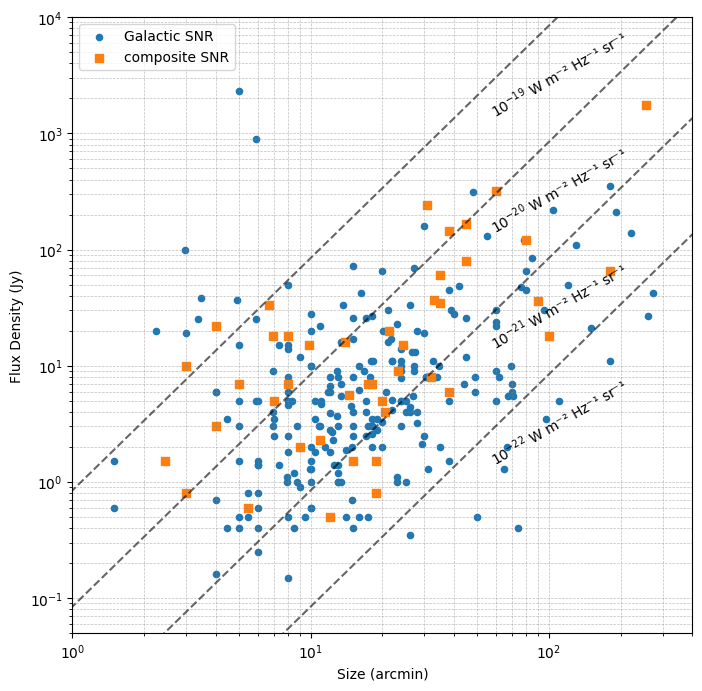

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def get_fluxsize(df):
    # 确保 'size' 和 'flux' 列存在，并删除 NaN 值
    df = df.dropna(subset=['size', 'flux'])

    # 处理 'size' 列：去除问号，并计算几何平均值（如果是 A x B 形式）
    def process_size(size):
        if isinstance(size, str):
            size = size.replace('?', '').strip()  # 移除问号和空格
            if 'x' in size:  # 处理 A x B 形式
                try:
                    a, b = map(float, size.split('x'))
                    return np.sqrt(a * b)  # 计算几何平均值
                except ValueError:
                    return np.nan  # 处理格式错误
            else:
                try:
                    return float(size)  # 直接转换为 float
                except ValueError:
                    return np.nan
        return np.nan  # 处理非字符串的异常情况

    df['size'] = df['size'].apply(process_size)

    # 处理 'flux' 列：
    df['flux'] = df['flux'].astype(str).str.replace('?', '', regex=False)  # 去除问号
    df['flux'] = df['flux'].replace('', np.nan)  # 把空字符串替换为 NaN
    #尝试转换为浮点数，如果失败则替换为 NaN
    df['flux'] = pd.to_numeric(df['flux'], errors='coerce')
    # df['flux'] = df['flux'].astype(float)  # 转换为浮点数


    # 再次删除 NaN 值，确保绘图数据完整
    df = df.dropna(subset=['size', 'flux'])

    return df




# 读取 CSV 文件
file_path = "../cat/three-cat.csv"  # 请替换为你的 CSV 文件路径
df_com = pd.read_csv(file_path, delimiter=',')
df_com = get_fluxsize(df_com)
df_green = pd.read_csv("../cat/greencat.csv", delimiter=',')
df_green = get_fluxsize(df_green)

# 绘制 Size vs Flux 散点图
plt.figure(figsize=(8, 8))

plt.grid(True, which="both", linestyle="--", linewidth=0.5, color='gray', alpha=0.5)
plt.scatter(df_green['size'], df_green['flux'], label=f"Galactic SNR", alpha=1, s=20)
plt.scatter(df_com['size'], df_com['flux'], label='composite SNR', alpha=1 ,marker='s', s=35)
plt.xlabel('Size (arcmin)')
plt.ylabel('Flux Density (Jy)')
plt.xscale('log')  # 适用于天文数据，常用对数尺度
plt.yscale('log')

sizes = np.logspace(np.log10(1e-1), np.log10(1e3), 100)
brightness_levels = [1e-19, 1e-20, 1e-21, 1e-22]  # 亮度 (W m⁻² Hz⁻¹ sr⁻¹)
conv_factor = 1e26 * (np.pi / (60 * 180))**2  # W m⁻² Hz⁻¹ sr⁻¹ 转换为 Jy

for brightness in brightness_levels:
    fluxes = brightness * conv_factor * (sizes ** 2)
    plt.plot(sizes, fluxes, 'k--', alpha=0.6)

    # 在中间位置标注数值
    x_text = sizes[len(sizes) // 2]
    y_text = brightness * conv_factor * ((x_text+30) ** 2)
    plt.text(x_text +45, y_text, f'$10^{{{int(np.log10(brightness))}}}$ W m⁻² Hz⁻¹ sr⁻¹',
             fontsize=10, color='black', rotation=30, ha='left')

# 添加额外说明
# plt.text(1, 1e-22, "The dashed lines represent constant surface brightness.", 
        #  fontsize=10, color='black')
plt.xlim(1,4e2)
plt.ylim(5e-2,1e4)
plt.legend()
plt.savefig('../figures/size_flux.png', dpi=300, bbox_inches='tight')
plt.show()


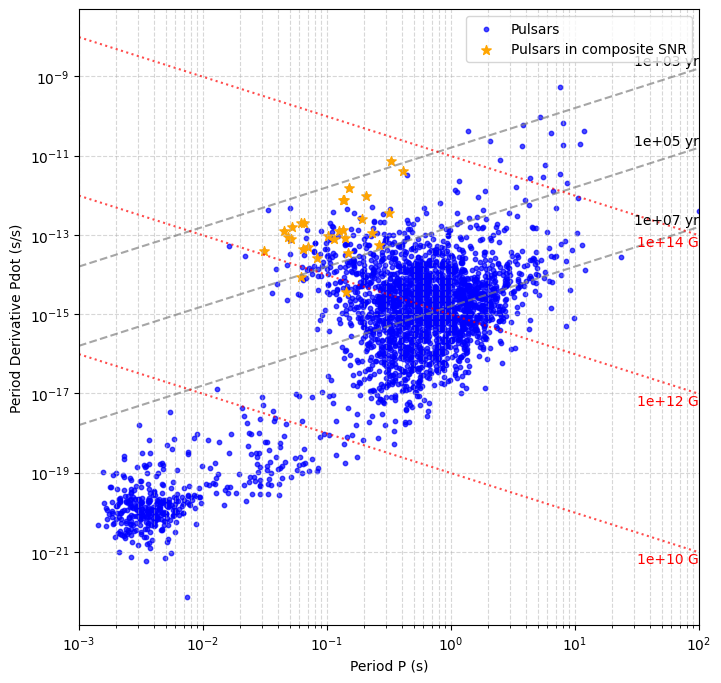

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from psrqpy import QueryATNF

# 查询 ATNF Catalogue，获取 P0 和 P1
query = QueryATNF(params=["PSRJ", "P0", "P1"])  # PSRJ: 脉冲星名称, P0: 自转周期, P1: 自转周期导数
df = query.table.to_pandas()  # 转换为 Pandas DataFrame

# 过滤掉缺失值
df = df.dropna(subset=["P0", "P1"])

# 将 P0 和 P1 转换为数值类型
df["P0"] = df["P0"].astype(float)  # 自转周期 (秒)
df["P1"] = df["P1"].astype(float)  # 周期变化率 (s/s)

# 读取三号目录 (three-cat.csv)
cco_df = pd.read_csv("../cat/three-cat.csv")

# 确保 'pulsar-CCO' 列存在
if "pulsar-CCO" in cco_df.columns:
    cco_pulsars = [name.replace("PSR ", "") for name in cco_df["pulsar-CCO"].dropna().astype(str).tolist()]
    cco_data = df[df["PSRJ"].isin(cco_pulsars)]
else:
    cco_data = pd.DataFrame()

# 绘制 P-Pdot 图
plt.figure(figsize=(8,8))


# 计算特征年龄 (tau = P / 2P1) 和磁场 (B = 3.2e19 * sqrt(P * P1)) 的等值线
P_vals = np.logspace(-3, 2, 100)  # P 取值范围（0.001s - 100s）

# 画特征年龄等值线 (单位: 年)
age_lines = [1e3, 1e5, 1e7]  # 10^3, 10^5, 10^7 年
for age in age_lines:
    P1_vals = P_vals / (2 * age * 365.25 * 24 * 3600)  # 计算 P1
    plt.plot(P_vals, P1_vals, linestyle="dashed", color="gray", alpha=0.7)
    plt.text(P_vals[-1], P1_vals[-1], f"{age:.0e} yr", verticalalignment="bottom", horizontalalignment="right")

# 画磁场等值线 (单位: G)
B_lines = [1e10, 1e12, 1e14]  # 10^10, 10^12, 10^14 G
for B in B_lines:
    P1_vals = (B / 3.2e19) ** 2 / P_vals  # 计算 P1
    plt.plot(P_vals, P1_vals, linestyle="dotted", color="red", alpha=0.7)
    plt.text(P_vals[-1], P1_vals[-1], f"{B:.0e} G", verticalalignment="top", horizontalalignment="right", color="red")
plt.scatter(df["P0"], df["P1"], s=10, color="blue", alpha=0.7, label="Pulsars")

# 如果 CCO 数据存在，则绘制橙色星型散点
if not cco_data.empty:
    plt.scatter(cco_data["P0"], cco_data["P1"], s=50, color="orange", marker="*", label="Pulsars in composite SNR")
# 设置对数坐标
plt.xlim(1e-3, 1e2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period P (s)")
plt.ylabel("Period Derivative Pdot (s/s)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()

# 保存图像
plt.savefig('../figures/pulsar_p-pdot.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
df["PSRJ"]

0       J0002+6216
1       J0006+1834
2       J0007+7303
4       J0012+5431
5       J0014+4746
           ...    
3741    J2354+6155
3743    J2354-2250
3744    J2355+0051
3746    J2355+1523
3747    J2355+2246
Name: PSRJ, Length: 2787, dtype: object

Figure(2250x2375)


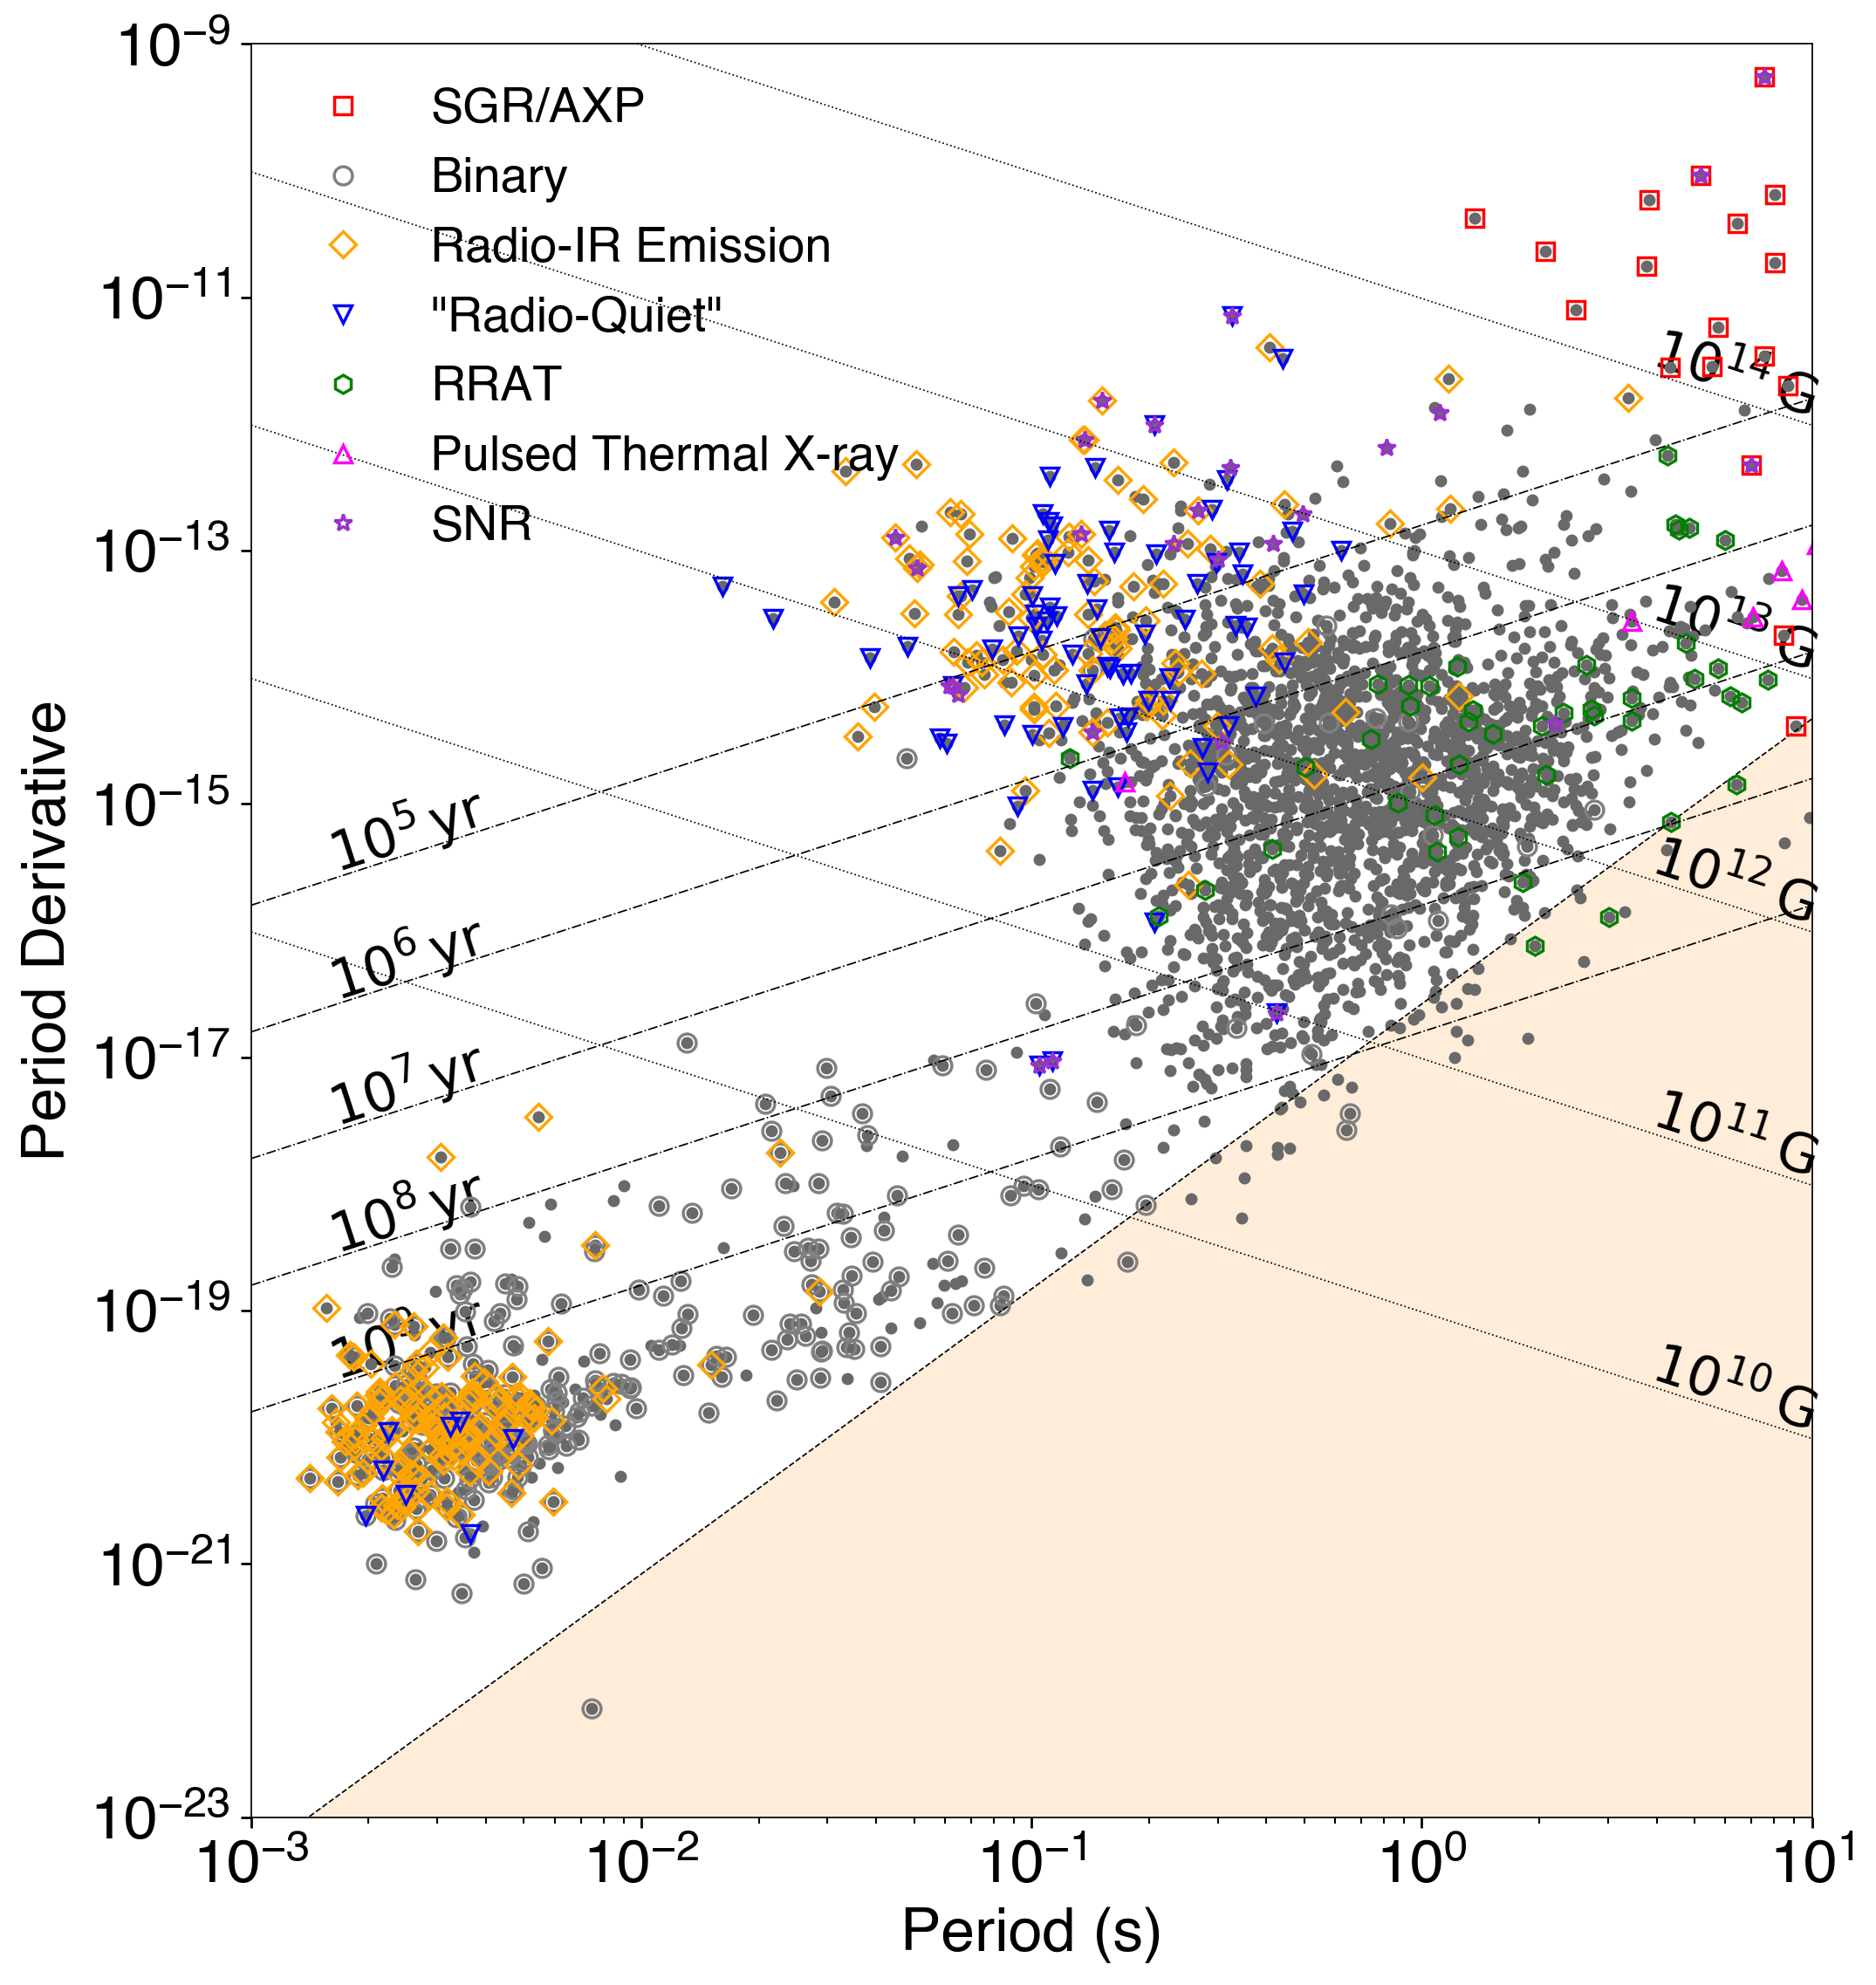

In [ ]:
from psrqpy import QueryATNF
query = QueryATNF(params=['P0', 'P1', 'ASSOC', 'BINARY', 'TYPE', 'P1_I'])
ax = query.ppdot(showSNRs=True, showtypes='all')
print(ax)

TypeError: 'Figure' object is not subscriptable

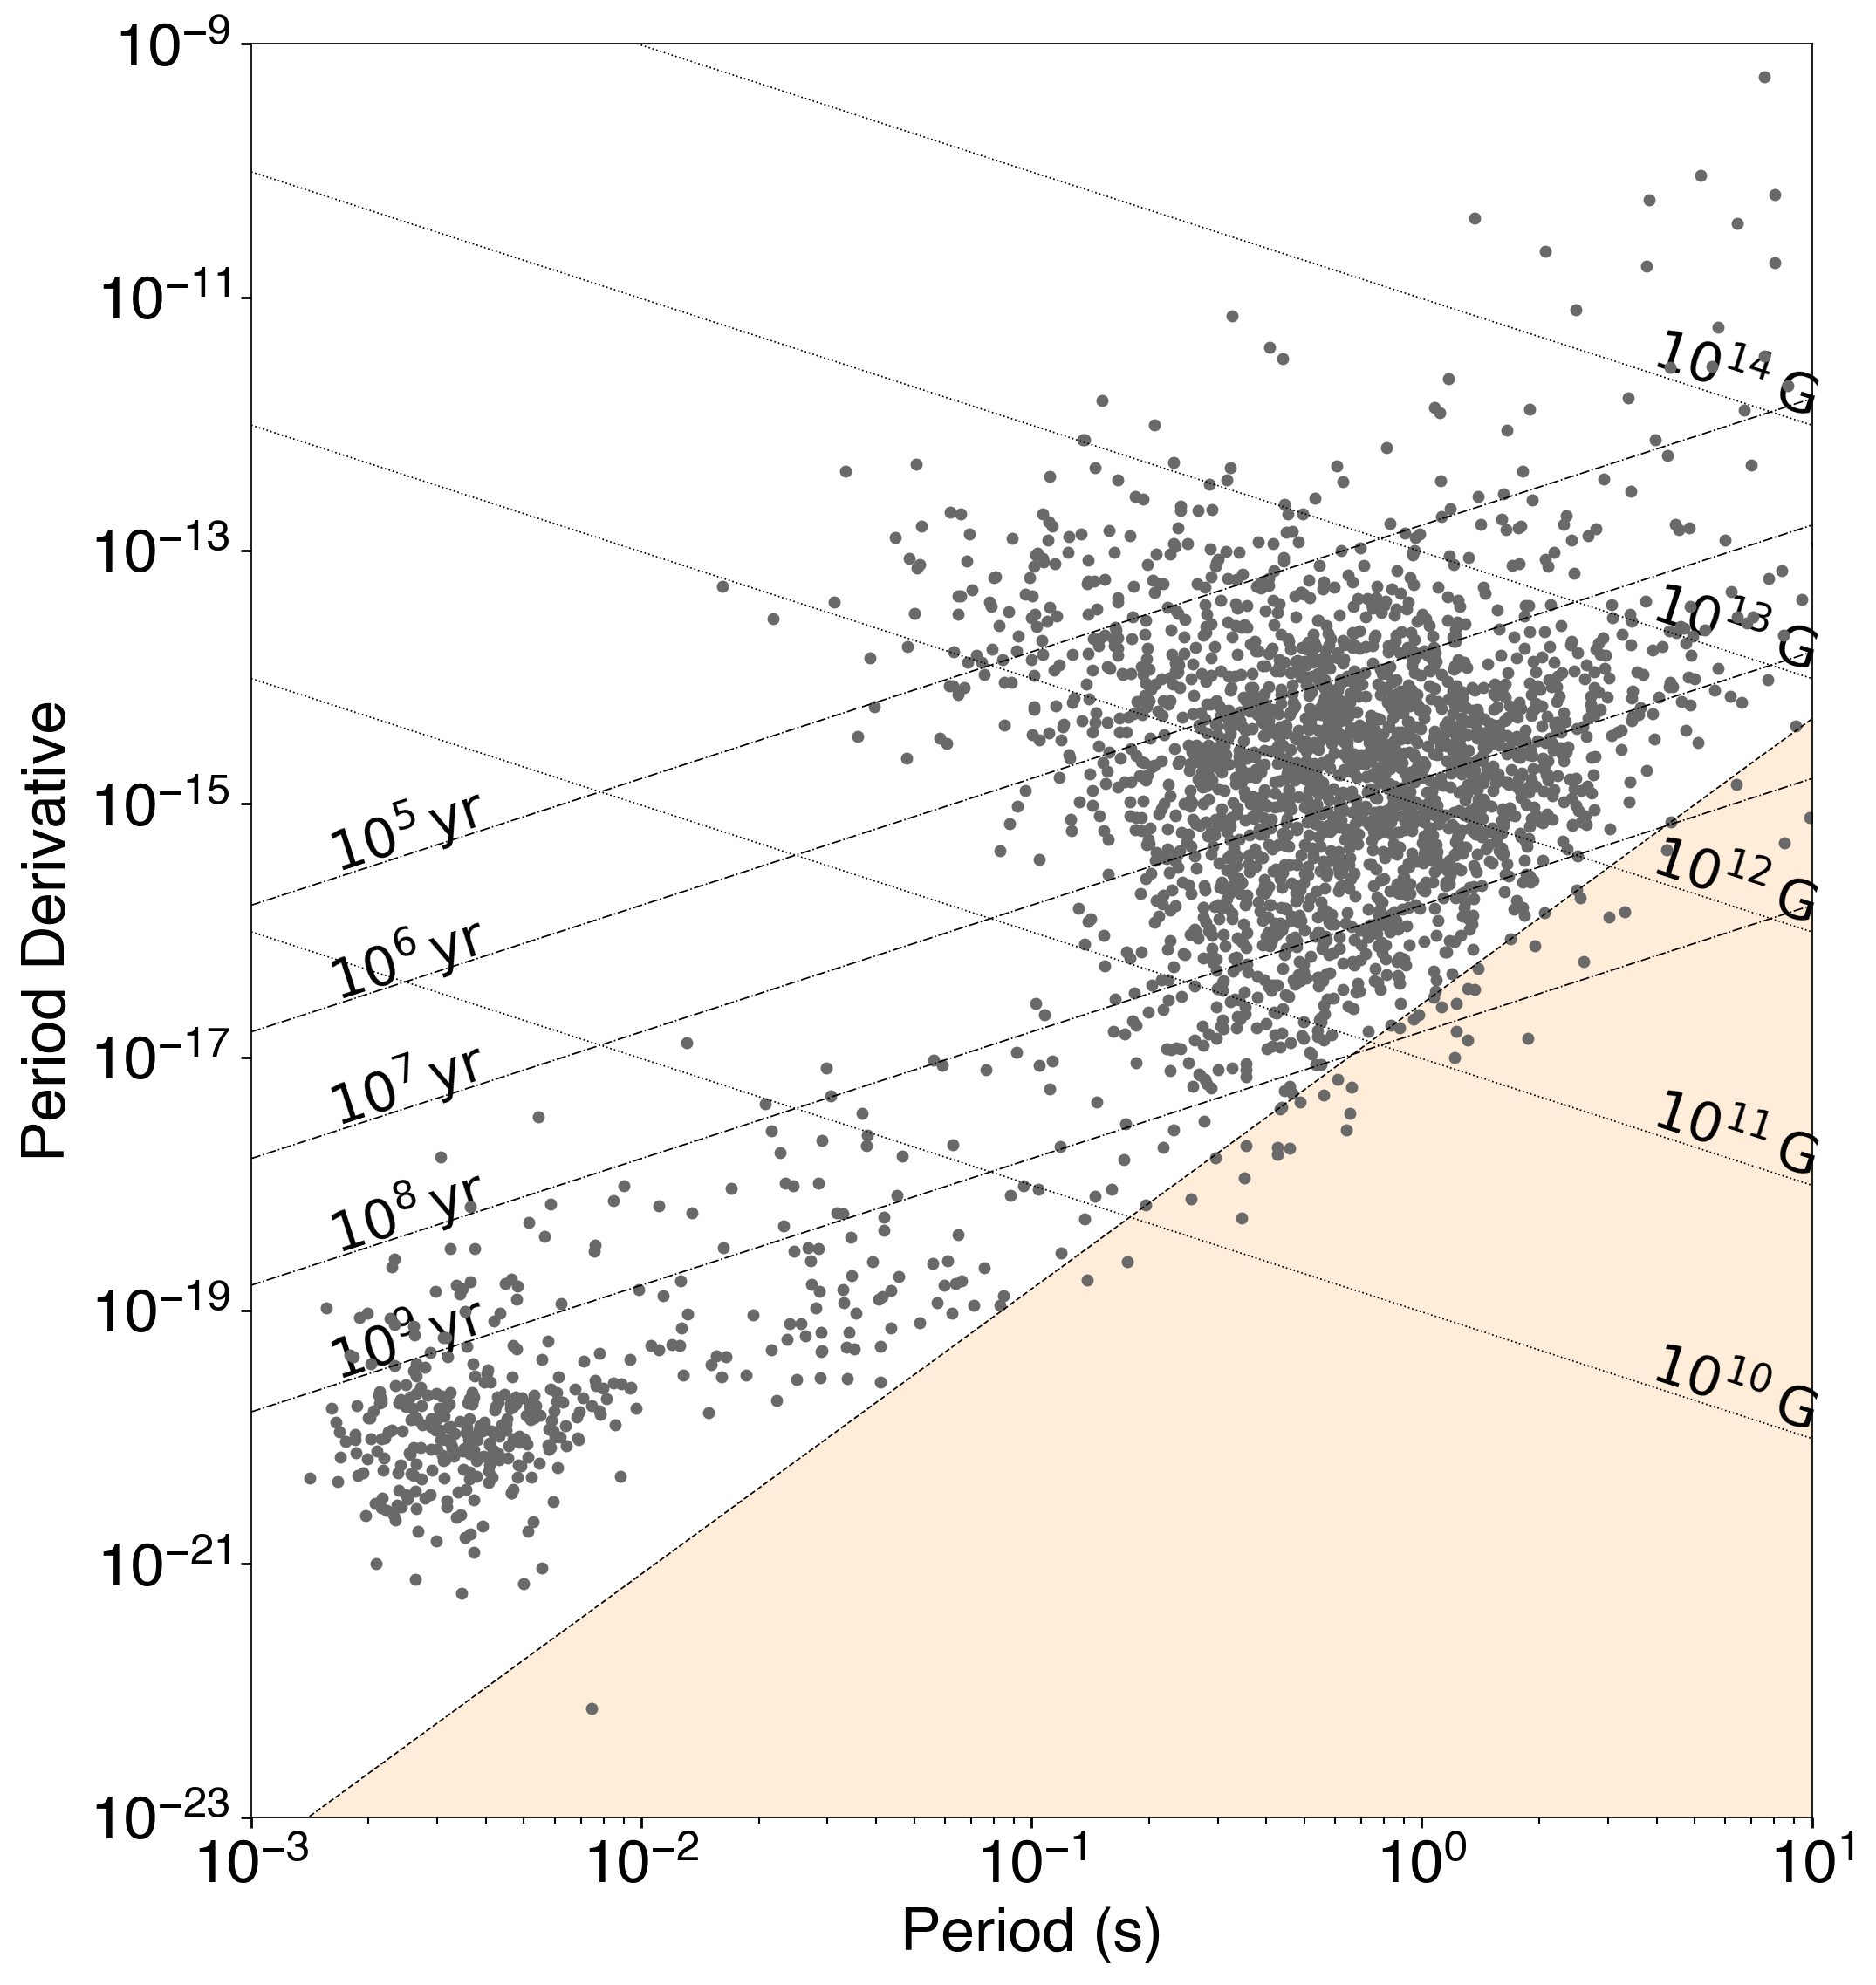

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from psrqpy import QueryATNF

# 查询 ATNF Catalogue，使用 ppdot 方法直接获取 P-Pdot 数据
query = QueryATNF()
df = query.ppdot()  # 获取 P (P0) 和 Pdot (P1)

# 过滤缺失值
# df = df.dropna(subset=["P", "P1"])

# 确保 P 和 P1 是数值类型
df["P"] = df["P"].astype(float)   # 自转周期 P (s)
df["P1"] = df["P1"].astype(float) # 周期导数 Pdot (s/s)

# 保存数据到 CSV 文件
df.to_csv("pulsar_p_pdot.csv", index=False)

# 绘制 P-Pdot 图
plt.figure(figsize=(8, 6))
plt.scatter(df["P"], df["P1"], s=10, color="blue", alpha=0.7, label="Pulsars")
plt.xscale("log")  # 对数刻度
plt.yscale("log")
plt.xlabel("Period P (s)")
plt.ylabel("Period Derivative Pdot (s/s)")
plt.title("P-Pdot Diagram of Pulsars")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.show()